In [181]:
import random
import math
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [251]:
import datetime

In [252]:
from datetime import date,timedelta

In [253]:
from datetime import datetime
then = datetime(2012, 3, 5, 23, 8, 15)        # Random date in the past
now  = datetime.now()                         # Now
duration = now - then                         # For build-in functions
duration_in_s = duration.total_seconds() 

In [327]:
df=pd.read_excel("USCAP.xlsx")

In [332]:
df["RESULT"].unique()

array(['NEGATIVE', nan, 'POSITIVE', 'FAILED'], dtype=object)

In [335]:
data=df

In [338]:
positive_data=data[data["RESULT"]=="POSITIVE"]
negative_data=data[data["RESULT"]=="NEGATIVE"]
category3_data=data[data["Bethesda Cathegory"]==3]
category4_data=data[data["Bethesda Cathegory"]==4]

In [351]:
df[["GENE MUTATED","RESULT"]].value_counts()

GENE MUTATED      RESULT  
0                 NEGATIVE    19
TSHR              NEGATIVE     5
HRAS              POSITIVE     3
NRAS              POSITIVE     3
0                 FAILED       2
                  POSITIVE     2
EZH1              NEGATIVE     2
BRAF              POSITIVE     1
GNAS              NEGATIVE     1
TERT,PIK3CA,PTEN  POSITIVE     1
dtype: int64

In [364]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [357]:
medicos=list(df["CYTOPATHOLOGIST"].unique())

In [360]:
medicos=[x for x in medicos if str(x) !="nan"]

In [361]:
medicos

[9.0, 2.0, 12.0, 7.0, 5.0]

In [382]:
def pos(x):
    ans=0
    if x in medicos:
        ans= df[(df["CYTOPATHOLOGIST"]==x)&(df["RESULT"]=="POSITIVE")].shape[0]/df[df["CYTOPATHOLOGIST"]==x].shape[0]
    return ans

In [383]:
for x in medicos:
    print(pos(x))

0.04
0.07407407407407407
0.06060606060606061
0.03225806451612903
0.05


In [384]:
positivity=[pos(x) for x in medicos]

In [386]:
category=[catIII(x) for x in medicos]

In [387]:
positivity

[0.04, 0.07407407407407407, 0.06060606060606061, 0.03225806451612903, 0.05]

In [388]:
category

[0.16, 0.2222222222222222, 0.18181818181818182, 0.0967741935483871, 0.3]

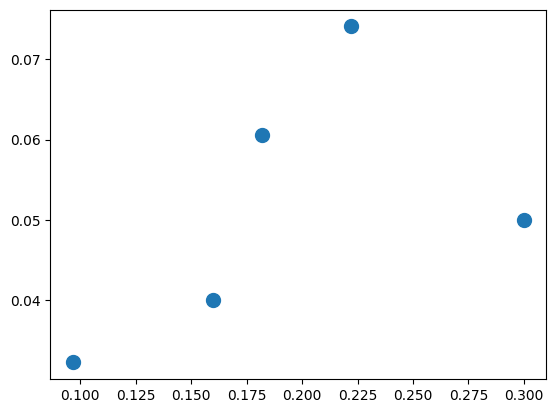

In [390]:
import matplotlib.pyplot as plt
_ = plt.plot(category,positivity, 'o', label='Original data', markersize=10)
plt.show()

In [385]:
def catIII(x):
    ans=0
    if x in medicos:
        ans= df[(df["CYTOPATHOLOGIST"]==x)&(df["Bethesda Cathegory"]==3)].shape[0]/df[df["CYTOPATHOLOGIST"]==x].shape[0]
    return ans
    

In [ ]:
catIII

In [344]:
negative_data.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
14,2021,DEMO-21-8516,2021-12-17,2021-12-21,Female,74,"Thyroid, Left Middle, Fine Needle Aspiration; ...",Thyroid,0,1,...,NEGATIVE,3,0,0,0,0,0.0,0,0.0,0.0
15,2021,DEMO-21-8517,2021-12-17,2021-12-21,Female,68,"Thyroid, Left Middle, Fine Needle Aspiration; ...",Thyroid,0,1,...,NEGATIVE,3,EZH1,Y642F,9,0,0.0,0,0.0,0.0
27,2021,DEMO-21-8616,2021-12-21,2021-12-27,Female,60,"Thyroid, Right Inferior, Fine Needle Aspiratio...",Thyroid,1,0,...,NEGATIVE,3,GNAS,Q227H,25,0,0.0,0,0.0,0.0
33,2021,DEMO-21-8633,2021-12-21,2021-12-23,Female,57,"Thyroid, Left Lobe, Fine Needle Aspiration; Sm...",Thyroid,0,1,...,NEGATIVE,3,0,0,0,0,0.0,0,0.0,0.0


In [337]:
positive_data=data[data["RESULT"]=="POSITIVE"]
negative_data=data[data["RESULT"]=="NEGATIVE"]
category3_data=data[data["Bethesda Cathegory"]==3]
category4_data=data[data["Bethesda Cathegory"]==4]

In [334]:
df["Bethesda Cathegory"].unique()

array([3, 6, 2, 4, 5, 1])

In [280]:
access=df["ACCESS_DATE"].to_list()

In [281]:
sign=df["SIGN_DATE"].to_list()

In [282]:
import itertools

In [296]:
duration= [(sign[i]-access[i]).days for i in range(len(df))]

In [298]:
set(duration)

{1, 2, 3, 4, 5, 6, 7, 8}

In [292]:
sign[1]-access[1]

Timedelta('5 days 00:00:00')

In [290]:
access[:5]

[Timestamp('2021-02-11 00:00:00'),
 Timestamp('2021-12-15 00:00:00'),
 Timestamp('2021-12-15 00:00:00'),
 Timestamp('2021-02-11 00:00:00'),
 Timestamp('2021-12-16 00:00:00')]

In [288]:
duration

[Timedelta('-5 days +00:00:00'),
 Timedelta('302 days 00:00:00'),
 Timedelta('302 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('307 days 00:00:00'),
 Timedelta('307 days 00:00:00'),
 Timedelta('307 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta

In [260]:
4003*60*60*24

345859200

In [182]:
import matplotlib

In [264]:
df=pd.read_excel("USCAP.xlsx")

In [326]:
df["RESULTS"].unique()

KeyError: 'RESULTS'

In [184]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [299]:
df["difference"]=df["SIGN_DATE"]-df["ACCESS_DATE"]

In [319]:
medicos=df["CYTOPATHOLOGIST"].unique()

In [321]:
cases=dict()

In [322]:
for medico in medicos:
    cases[medico]=df[df["CYTOPATHOLOGIST"]==medico].shape[0]

In [323]:
cases

{9.0: 50, 2.0: 27, 12.0: 66, 7.0: 31, 5.0: 20, nan: 0}

In [317]:
df.describe()

,YEAR,AGE,RIGHT,LEFT,ISTHMUS,Bethesda Cathegory,CYTOPATHOLOGIST,SIZE,CNV,PTH,C-CELLS,difference
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,194.000000,35.000000,39.000000,39.0,39.0,195
mean,2021.538462,55.420513,0.487179,0.415385,0.097436,2.400000,8.314433,3.092857,0.025641,0.0,0.0,4 days 01:06:27.692307692
std,0.499802,13.601379,0.501122,0.494057,0.297314,1.032463,3.429391,3.864744,0.160128,0.0,0.0,1 days 12:10:04.963927052
min,2021.000000,16.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.400000,0.000000,0.0,0.0,1 days 00:00:00
25%,2021.000000,46.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1.430000,0.000000,0.0,0.0,3 days 00:00:00
50%,2022.000000,56.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,0.000000,0.0,0.0,4 days 00:00:00
75%,2022.000000,63.500000,1.000000,1.000000,0.000000,3.000000,12.000000,3.000000,0.000000,0.0,0.0,5 days 00:00:00
max,2022.000000,86.000000,1.000000,1.000000,1.000000,6.000000,12.000000,23.000000,1.000000,0.0,0.0,8 days 00:00:00


In [185]:
explainer= dict()

In [186]:
explainer["ROM"]= "Risk of malignancy"
explainer["VAF"]="Variant Allele frequency"
explainer["CNV"]="Copy number variations"
explainer["GEP"]="Gene expression profile"
explainer["PTH"]="Parathoyd hormone"
explainer["C-CELLS"]="A type of cell in the thyroid. C cells make calcitonin, a hormone that helps control the calcium level in the blood."

In [249]:
df["FUSIONS"].value_counts()

0             38
PAX8/PPARG     1
Name: FUSIONS, dtype: int64

In [244]:
df["GEP"].value_counts()

0           33
SLC5A5       3
POSITIVE     3
Name: GEP, dtype: int64

In [233]:
for key in libro.keys():
    libro[key]=[libro[key]]

In [223]:
data

{'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

In [234]:
pd.DataFrame.from_dict(libro)

,0,Q61R,"L512R,c.1535T>G",Y642F,Q227H,Q61K,D633H,Q571R,V600E,SLC5A5,M453T,"H1047R,D77Afs*22,C228T",S281N
0,23,5,1,1,1,1,1,1,1,1,1,1,1


In [215]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [219]:
data

{'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

In [214]:
pd.DataFrame.from_dict(a)

ValueError: If using all scalar values, you must pass an index

In [22]:
pathos=df["CYTOPATHOLOGIST"].tolist()

In [24]:
pathos=list(map(lambda z: "CYTOPATHOLOGIST "+ str(int(z)),pathos))

ValueError: cannot convert float NaN to integer

In [16]:
df.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
explainer

{'ROM': 'Risk of malignancy',
 'VAF': 'Variant Allele frequency',
 'CNV': 'Copy number variations',
 'GEP': 'Gene expression profile',
 'PTH': 'Parathoyd hormone',
 'C-CELLS': 'A type of cell in the thyroid. C cells make calcitonin, a hormone that helps control the calcium level in the blood.'}

In [7]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [8]:
df[" CNV"].head()

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
Name:  CNV, dtype: float64

In [5]:
cat=len(df[df["Bethesda Cathegory"]==3])

In [6]:
100*cat/len(df)

17.94871794871795

In [20]:
df

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2022,DEMO-22-15,2022-01-03,2022-01-05,Female,42,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2022,DEMO-22-1500,2022-03-03,2022-03-07,Female,33,"Thyroid, Right Nodule, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2022,DEMO-22-1504,2022-03-03,2022-03-07,Female,57,"Thyroid, Right Superior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2022,DEMO-22-1505,2022-03-03,2022-03-07,Female,47,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df[""]

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [28]:
df["GEP"].describe

<bound method NDFrame.describe of 0      SLC5A5
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
190       NaN
191       NaN
192       NaN
193       NaN
194         0
Name: GEP, Length: 195, dtype: object>

In [16]:
set(df["RESULT"].tolist())

{'FAILED', 'NEGATIVE', 'POSITIVE', nan}

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 4, 6, 7, 5, 9, 7, 8]
))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
    ),
   
)

fig.show()

In [7]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [15]:
df[["ACCESS_DATE","SIGN_DATE"]]

,ACCESS_DATE,SIGN_DATE
0,2021-02-11,2021-02-16
1,2021-12-15,2021-12-20
2,2021-12-15,2021-12-20
3,2021-02-11,2021-02-16
4,2021-12-16,2021-12-20
...,...,...
190,2022-01-03,2022-01-05
191,2022-03-03,2022-03-07
192,2022-03-03,2022-03-07
193,2022-03-03,2022-03-07


In [16]:
fechas=df["SIGN_DATE"].to_list()

In [29]:
import datetime

In [30]:
from datetime import date, timedelta

In [24]:
min(fechas)

Timestamp('2021-01-11 00:00:00')

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
hoy=date.today()

In [40]:
hoy

datetime.date(2023, 2, 13)

In [41]:
ayer=hoy.replace(day=hoy.day-1)

In [67]:
del(list)

In [105]:
pathologists=df["CYTOPATHOLOGIST"].tolist()

In [106]:
pathologists=[x for x in pathologists if str(x) !="nan"]

In [107]:
pathologists

[9.0,
 2.0,
 2.0,
 9.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 9.0,
 2.0,
 9.0,
 2.0,
 9.0,
 12.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 12.0,
 7.0,
 12.0,
 7.0,
 9.0,
 7.0,
 12.0,
 9.0,
 9.0,
 12.0,
 9.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 9.0,
 2.0,
 2.0,
 2.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 7.0,
 7.0,
 5.0,
 5.0,
 12.0,
 12.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 5.0,
 7.0,
 7.0,
 7.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,


In [108]:
pathologists=list(map(lambda z:int(z),pathologists))

In [109]:
pathologists

[9,
 2,
 2,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 2,
 9,
 2,
 9,
 12,
 12,
 12,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 12,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 7,
 12,
 7,
 9,
 7,
 12,
 9,
 9,
 12,
 9,
 7,
 2,
 2,
 2,
 2,
 2,
 9,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 7,
 7,
 5,
 5,
 12,
 12,
 12,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 12,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 7,
 7,
 7,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 12,
 5,
 12,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 12,
 5,
 5,
 5,
 5,
 5,
 12,
 5,
 5,
 5,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 2,
 12,
 12,
 12,
 12]

In [113]:
set(pathologists)

{'Pathologist 12',
 'Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 9'}

In [111]:
pathologists=[ "Pathologist "+str(x) for x in pathologists]

In [112]:
pathologists

['Pathologist 9',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 9',
 'Pathologist 7',
 'Pathologist 12',
 'Pathologist 9',
 '

In [61]:
a=[1,3,4]

In [62]:
b=list(lambda z:2*z,a))

TypeError: 'list' object is not callable

In [66]:
list

[9.0,
 2.0,
 2.0,
 9.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 9.0,
 2.0,
 9.0,
 2.0,
 9.0,
 12.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 12.0,
 7.0,
 12.0,
 7.0,
 9.0,
 7.0,
 12.0,
 9.0,
 9.0,
 12.0,
 9.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 9.0,
 2.0,
 2.0,
 2.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 7.0,
 7.0,
 5.0,
 nan,
 5.0,
 12.0,
 12.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 5.0,
 7.0,
 7.0,
 7.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 

In [63]:
list(map(lambda n: n * 2, [1, 2, 3, 4, 5]))

TypeError: 'list' object is not callable

In [114]:
pathologists=df["CYTOPATHOLOGIST"].tolist()
pathologists=[x for x in pathologists if str(x) !="nan"]
pathologists=list(map(lambda z:"Pathologist "+str(int(z)),pathologists))
pathologists=list(set(pathologists))
pathologists=["All Pathologists"]+pathologists


In [115]:
pathologists

['All Pathologists',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 12']

In [117]:
df["AGE"].describe()

count    195.000000
mean      55.420513
std       13.601379
min       16.000000
25%       46.000000
50%       56.000000
75%       63.500000
max       86.000000
Name: AGE, dtype: float64

In [118]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [119]:
# datetime(year, month, day, hour, minute, second)
a = datetime.datetime(2017, 6, 21, 18, 25, 30)
b = datetime.datetime(2017, 5, 16, 8, 21, 10)
  
# returns a timedelta object
c = a-b 
print('Difference: ', c)
  
minutes = c.total_seconds() / 60
print('Total difference in minutes: ', minutes)
  
# returns the difference of the time of the day
minutes = c.seconds / 60
print('Difference in minutes: ', minutes)


Difference:  36 days, 10:04:20
Total difference in minutes:  52444.333333333336
Difference in minutes:  604.3333333333334


In [123]:
df["new_column"] = df.apply(lambda x: x["SIGN_DATE"] - x["ACCESS_DATE"], axis = 1)

In [125]:
tiempos=df["new_column"].tolist()

In [128]:
type(tiempos[0]).todate

pandas._libs.tslibs.timedeltas.Timedelta

In [129]:
tiempos=list(map(lambda z:z.days,tiempos))

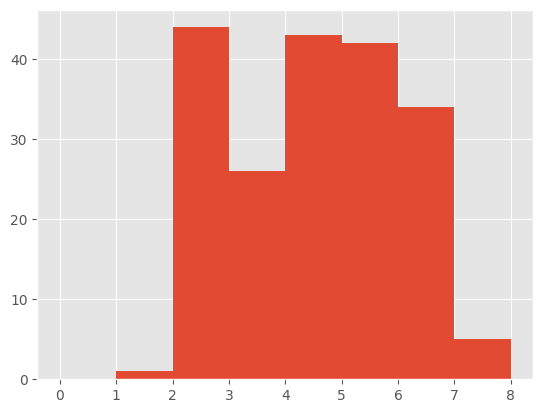

In [142]:
import matplotlib.pyplot as plt


plt.hist(tiempos,bins=list(range(0,9)))
plt.style.use('ggplot')
plt.show()

In [144]:
np.mean(tiempos)

4.046153846153846

In [148]:
cats=df["Bethesda Cathegory"].to_list()
cats=[x for x in cats if str(x) !="nan"]

In [149]:
cats

[3,
 6,
 6,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 5,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 6,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 6,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 6,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 6,
 3,
 2,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 1,
 3,
 5,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 6,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 2,
 6,
 2,
 2,
 1,
 3]

(array([ 12., 131.,  35.,   5.,  12.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

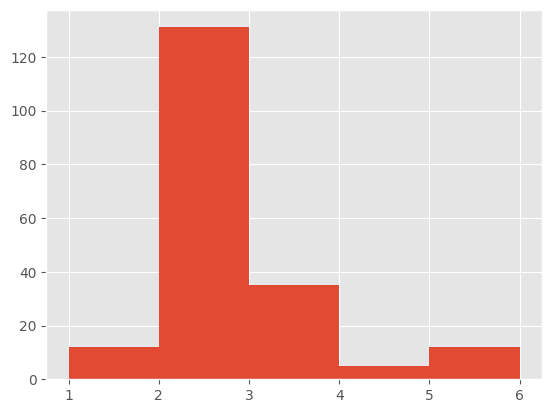

In [150]:
plt.hist(cats,bins=list(range(1,7)))

In [153]:
df["Bethesda Cathegory"].unique()

array([3, 6, 2, 4, 5, 1])

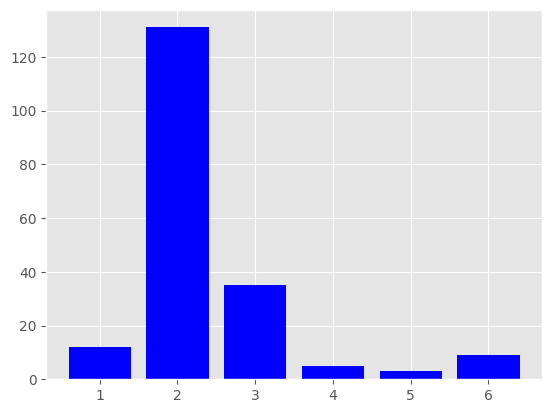

In [156]:


labels, counts = np.unique(cats, return_counts=True)
plt.bar(labels, counts, align='center',color="blue")
plt.gca().set_xticks(labels)
plt.show()

In [14]:
df["Bethesda Category"].count()

KeyError: 'Bethesda Category'

In [19]:
cosas=df["Bethesda Cathegory"].value_counts().to_dict()

In [20]:
cosas

{2: 131, 3: 35, 1: 12, 6: 9, 4: 5, 5: 3}

In [22]:
list(cosas.keys()

dict_keys([2, 3, 1, 6, 4, 5])

In [21]:
make_pie(cosas.keys(),cosas.values(),"askldjf")

NameError: name 'make_pie' is not defined

In [27]:
df.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape

(195, 28)

In [32]:
df[(df["AGE"]==48)&(df["YEAR"]==2022)].shape

(5, 28)

In [37]:
df["SEX"][18]

'Male'

In [44]:
df["AGE"].unique()

array([29, 59, 48, 64, 28, 63, 54, 80, 62, 74, 68, 61, 38, 72, 27, 46, 31,
       60, 57, 50, 55, 49, 22, 41, 58, 76, 43, 56, 75, 77, 51, 52, 79, 32,
       69, 40, 19, 65, 16, 78, 86, 66, 39, 45, 71, 34, 70, 44, 42, 67, 81,
       53, 33, 47])

In [49]:
import date


ModuleNotFoundError: No module named 'date'

In [48]:
df["SIGN_DATE"][0]

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
import datetime

In [51]:
from datetime import date,timedelta

In [54]:
import pandas as pd

In [55]:
df["ACCESS_DATE"]>pd.to_datetime(date.today())

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Name: ACCESS_DATE, Length: 195, dtype: bool

In [63]:
df[["RESULT","ADEQUACY"]].value_counts()

RESULT    ADEQUACY  
NEGATIVE  ADEQUATE      27
POSITIVE  ADEQUATE      10
FAILED    INADEQUATE     2
dtype: int64

In [67]:
df.shape[0]

195

In [72]:
def make_bar(values,names,title):
    # fig = px.pie( names=names,values=values, sort=False)
    fig = go.Figure(
    data=[go.Bar(
        labels=names,
        values=values,
        # Second, make sure that Plotly won't reorder your data while plotting
        sort=False)
    ])
    fig.update_layout(
        autosize=False,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":"Bethesda category distribution",
        'y':0.98,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        # legend_traceorder="reversed",

    )

    return fig

In [73]:
make_bar([2,3,4],["asdf","aljkd","lakjdf"],"Camilo")

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'labels'

Did you mean "base"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "base"?

Bad property path:
labels
^^^^^^

In [75]:
df.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
import plotly.express as px

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()

In [76]:
wide_df.head()

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [78]:
df["ROM"].describe()

count     39
unique     7
top        3
freq      27
Name: ROM, dtype: int64

In [79]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [325]:
df["RESULT"].value_counts()

NEGATIVE    27
POSITIVE    10
FAILED       2
Name: RESULT, dtype: int64

In [81]:
df["GENE MUTATED"].value_counts().to_dict

<bound method Series.to_dict of 0                   23
TSHR                 5
NRAS                 3
HRAS                 3
EZH1                 2
GNAS                 1
BRAF                 1
TERT,PIK3CA,PTEN     1
Name: GENE MUTATED, dtype: int64>

In [83]:
df["ROM"].unique()

array([3, nan, 50, 70, 99, 40, 0, '?'], dtype=object)

In [93]:
df["ROM"].unique()

array([3, nan, 50, 70, 99, 40, 0, '?'], dtype=object)

In [102]:
df[["GENE MUTATED","RESULT"]].value_counts()

GENE MUTATED      RESULT  
0                 NEGATIVE    19
TSHR              NEGATIVE     5
HRAS              POSITIVE     3
NRAS              POSITIVE     3
0                 FAILED       2
                  POSITIVE     2
EZH1              NEGATIVE     2
BRAF              POSITIVE     1
GNAS              NEGATIVE     1
TERT,PIK3CA,PTEN  POSITIVE     1
dtype: int64

In [103]:
import plotly.express as px

wide_df = px.data.medals_wide()

In [104]:
wide_df.head()

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [ ]:
import plotly.express as px

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()

In [105]:
feg = px.bar( x=["A","B"], y=[[2,3]], title="Wide-Form Input")

feg.show()

In [113]:
beth=df["Bethesda Cathegory"].unique()



In [143]:
labels=sorted(list(beth))

In [144]:
labels

[1, 2, 3, 4, 5, 6]

In [120]:
values=[len(df[df["Bethesda Cathegory"]==label])for label in labels]

In [121]:
values

[12, 131, 35, 5, 3, 9]

In [162]:
bar_data=pd.DataFrame()
bar_data["values"]=values
bar_data["labels"]=labels
bar_data["labels"]=bar_data["labels"].astype(str)

In [166]:
feg = px.bar( bar_data,x="labels", y="values", title="Wide-Form Input",color="labels",
# color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta","orange"]
)
feg.update_layout(
        autosize=False,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":"This is camilo",
        'y':0.98,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        # legend_traceorder="reversed",

    )

feg.show()

In [131]:
testdf = px.data.tips()

In [132]:
testdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [155]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.bar(df, y="continent", x="pop", color="continent", orientation="h", hover_name="country",
             title="Explicit color mapping",
             color_discrete_sequence=["purple", "green", "blue", "goldenrod", "magenta","orange"])
            #  color_discrete_map={
            #     "Europe": "red",
            #     "Asia": "orange",
            #     "Americas": "blue",
            #     "Oceania": "goldenrod",
            #     "Africa": "magenta"},)

fig.show()

In [175]:
testdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [176]:
bar_data=pd.DataFrame()
bar_data["values"]=values
bar_data["labels"]=labels
bar_data["labels"]=bar_data["labels"].astype(str)

In [179]:
make_bar(bar_data,"labels","values")

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'labels'

Did you mean "base"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "base"?

Bad property path:
labels
^^^^^^

In [180]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [396]:
fig_tab = go.Figure(data=[go.Table(header=dict(values=['A Scores', 'B Scores']),
                 cells=dict(values=[[100, 90, 80, 90], [95, 85, 75, 95]],line_color='darkslategray',
               fill_color='black'))])
                     
fig_tab.update_layout(
        autosize=True,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":"Somethings else",
        'y':0.98,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top',
        },
        legend_title="",
        xaxis_title=None,


        # legend_traceorder="reversed",

    )